## Logistic Regression
1. It is for categorical values
2. Can be used for binary values. example: Customer is likely to cancel service. It linear regression we predict for numeric variables whereas for logistic model we guess for ordinal values. customer churn model, employee attrition model.
3. data is free of missing values.
4. Predictant value is binary or ordinal(that is categorical variable with ordered value).
5. All predictors are independent of each other
6. There are atleast 50 observation data.

In [127]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pylab import rcParams
from sklearn.preprocessing import scale 
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [129]:
address = '/Users/manansharma/Documents/Python/Business Requirement Data Science/titanic-training-data.csv'

titanic_data = pd.read_csv(address)
titanic_data.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


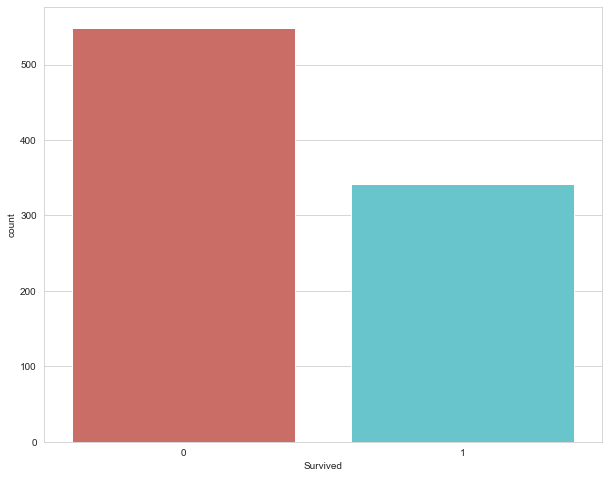

In [132]:
age = titanic_data['Age']
parch = titanic_data['Parch']
sb.countplot(x='Survived', data = titanic_data, palette='hls')

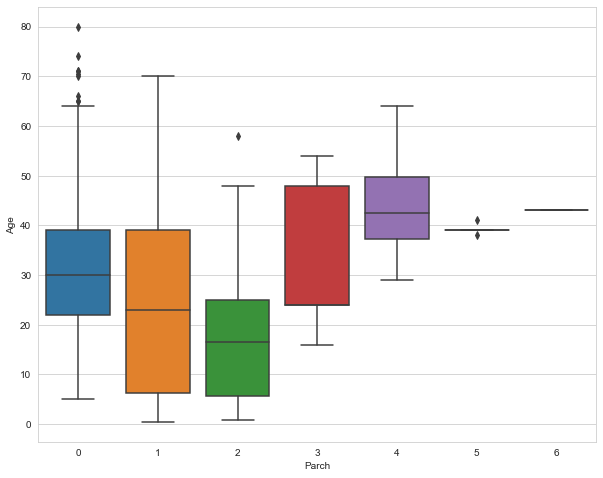

In [133]:
sb.boxplot(x = 'Parch', y = 'Age', data = titanic_data)

Parch is number of parents in the ship. As age increases parch increases. 

In [134]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])

In [136]:
Parch_groups. head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [137]:
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [138]:
final_titanic = titanic_data.drop(['Name','Cabin','Pclass'],axis=1)
print(final_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None


In [139]:
def changeAge(cols):
    age = cols[0]
    parch = cols[1]

    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 44
        elif parch == 5:
            return 39
        elif parch == 6:
            return 43
    else:
        return age


In [140]:
final_titanic['Age'] = final_titanic[['Age','Parch']].apply(changeAge,axis = 1)

In [141]:
final_titanic.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [142]:
final_titanic.dropna(inplace=True)
final_titanic.reset_index(inplace=True,drop=True)

In [143]:

print(final_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Ticket       889 non-null    object 
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.6+ KB
None


## Re-format and encode data

In [144]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
gender = final_titanic['Sex']
genderEncoded = label.fit_transform(gender)

In [145]:
genderEncoded[0:5]

array([1, 0, 0, 0, 1])

In [146]:
final_titanic.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,female,35.0,1,0,113803,53.1000,S
4,5,0,male,35.0,0,0,373450,8.0500,S


In [156]:
genderDf = pd.DataFrame(genderEncoded,columns=['male-gender'],dtype=float)
genderDf

,male-gender
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
884,1.0
885,0.0
886,0.0
887,1.0


In [148]:
embarked = final_titanic['Embarked']
embarkedEncoder = label.fit_transform(embarked)
embarkedEncoder[0:50]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2])

In [149]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncode = OneHotEncoder(categories='auto')


In [150]:
embarkedOneHot = oneHotEncode.fit_transform(embarkedEncoder.reshape(-1,1))
embarkedOne = embarkedOneHot.toarray()
embarkedDf = pd.DataFrame(embarkedOne, columns=['C','Q','S'])
embarkedDf.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [153]:
final_titanic.drop(['Sex','Embarked'],axis=1)
#titanic_dataFrame = pd.concat((final_titanic,genderDf,embarkedDf),axis = 1, verify_integrity= True).astype(float)
#titanic_dataFrame.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare
0,1,0,22.0,1,0,A/5 21171,7.2500
1,2,1,38.0,1,0,PC 17599,71.2833
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,35.0,1,0,113803,53.1000
4,5,0,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...
884,887,0,27.0,0,0,211536,13.0000
885,888,1,19.0,0,0,112053,30.0000
886,889,0,17.0,1,2,W./C. 6607,23.4500
887,890,1,26.0,0,0,111369,30.0000


In [157]:
titanic_dataFrame = pd.concat([final_titanic,genderDf,embarkedDf], axis = 1, verify_integrity= True).astype(float)
#titanic_dataFrame.head()

ValueError: could not convert string to float: 'male'